## Keertana V. Chidambaram <br/>Computation Lab 1a - Numerical Differentiation, Integration, and Newton's Method

### Numerical Differentiation

In [3]:
import sympy as sy
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time
from autograd import elementwise_grad
from autograd import numpy as anp

#### Problem 1

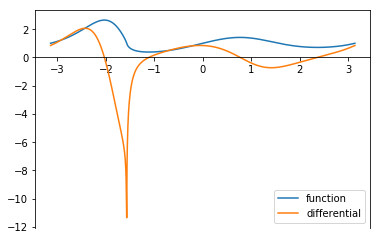

In [3]:
x = sy.symbols('x')
f = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
f_dash = sy.diff(f)
g = sy.lambdify(x, f)
g_dash = sy.lambdify(x, f_dash)
NUM_POINTS = 1000 #change to vary the accuracy of graph
x_vals = np.linspace(-1 * np.pi, np.pi, NUM_POINTS)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(x_vals, g(x_vals), label = "function")
plt.plot(x_vals, g_dash(x_vals), label = "differential")
plt.legend()

#### Problem 2

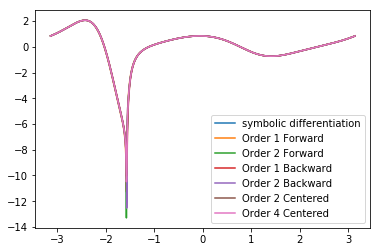

In [4]:
def forward_1(f, x_vals, h = 0.001):
    return [(f(x + h) - f(x)) / h for x in x_vals]

def forward_2(f, x_vals, h = 0.001):
    return [(-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h) for x in x_vals]

def backward_1(f, x_vals, h = 0.001):
    return [(f(x) - f(x - h)) / h for x in x_vals]

def backward_2(f, x_vals, h = 0.001):
    return [(3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h) for x in x_vals]

def centered_1(f, x_vals, h = 0.001):
    return [(f(x + h) - f(x - h)) / (2 * h) for x in x_vals]

def centered_2(f, x_vals, h = 0.001):
    return [(f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h) for x in x_vals]

h = 0.01
plt.plot(x_vals, g_dash(x_vals), label = "symbolic differentiation")
plt.plot(x_vals, forward_1(g, x_vals, h), label = "Order 1 Forward")
plt.plot(x_vals, forward_2(g, x_vals, h), label = "Order 2 Forward")
plt.plot(x_vals, backward_1(g, x_vals, h), label = "Order 1 Backward")
plt.plot(x_vals, backward_2(g, x_vals, h), label = "Order 2 Backward")
plt.plot(x_vals, centered_1(g, x_vals, h), label = "Order 2 Centered")
plt.plot(x_vals, centered_2(g, x_vals, h), label = "Order 4 Centered")

plt.legend()

From the graph, we can infer that any of the six approximation formulas give almost the same result as the actual derivate (with negligible error). Hence, based on the application, the approximation methods can be used in place of the real differential.

#### Problem 3

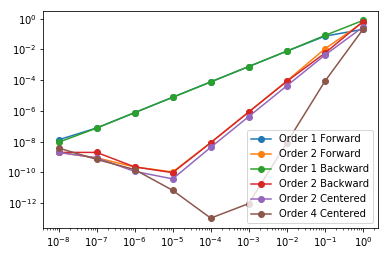

In [5]:
def plot_abs_error(f, x0):
    '''
    Function plots the absolute error in calculation of differential
    for each of the six approximation methods w.r.t the actual differential
    calculated from symbolic differentiation method.
    Inputs: f: symbolic function, x0: float
    '''
    f_dash = sy.diff(f)
    g_dash = sy.lambdify(x, f_dash)
    y_sym = g_dash(x0)
    h_vals = np.logspace(-8, 0, 9)
    
    f_1 = np.array([forward_1(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(f_1 - y_sym), label = "Order 1 Forward", marker='o')
    
    f_2 = np.array([forward_2(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(f_2 - y_sym), label = "Order 2 Forward", marker='o')
                
    b_1 = np.array([backward_1(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(b_1 - y_sym), label = "Order 1 Backward", marker='o')
                
    b_2 = np.array([backward_2(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(b_2 - y_sym), label = "Order 2 Backward", marker='o')
    
    c_1 = np.array([centered_1(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(c_1 - y_sym), label = "Order 2 Centered", marker='o')

    c_2 = np.array([centered_2(g, [x0], h) for h in h_vals])
    plt.loglog(h_vals, abs(c_2 - y_sym), label = "Order 4 Centered", marker='o')
    
    plt.loglog()
    plt.legend()
    plt.show()

plot_abs_error(f, 1)

#### Problem 5

In [6]:
def calc_jacobian(f, x0, h=0.01):
    jacobian = []
    for i in range(len(x0)):
        x1, x2 = x0[:], x0[:]
        x1[i], x2[i] = (x1[i] + h, x2[i] - h)
        jacobian.append((np.array(f(*x1)) - np.array(f(*x2))) / (2 * h))

    return jacobian

x, y = sy.symbols('x y')
g = [x ** 2, x ** 3 - y]

#Solution using sympy
print(np.array([[sy.diff(g[i], x).subs({x: 5, y:7}).evalf() for i in range(len(g))],\
    [sy.diff(g[i], y).subs({x: 5, y:7}).evalf() for i in range(len(g))]]))

#solution using numerical method
f = sy.lambdify((x, y), g)
x0 = [5,7]
jacobian = np.array(calc_jacobian(f, x0))
print(jacobian)

[[10.0000000000000 75.0000000000000]
 [0 -1.00000000000000]]
[[10.     75.0001]
 [ 0.     -1.    ]]


We find that the solution from symbolic method and numerical method both produce approximately the same results.

#### Problem 6

C:\Users\admin\Anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


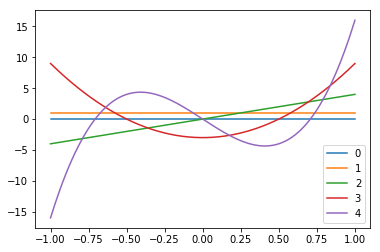

In [11]:
def Chebyshev(x, n):
    if n > 1:
        return 2 * x * Chebyshev(x, n-1) - Chebyshev(x, n-2)
    elif n == 1:
        return x
    elif n == 0:
        return anp.ones_like(x)
dChebyshev = elementwise_grad(Chebyshev)

xvals = np.linspace(-1, 1, 200)
for n in range(5):
    plt.plot(xvals, dChebyshev(xvals, n), label=n)
plt.legend()
plt.show()

### Newton's Method

#### Problem 1

In [17]:
def fun1(f, x0, f_dash, tol=1e-5, maxiter=15):
    x = x0
    converged = False
    for i in range(maxiter):
        xnew = x - f(x) / f_dash(x)
        if abs(x - xnew) < tol:
            converged = True
            break
        x = xnew
    return (xnew, converged, i+1)

In [20]:
x = sy.symbols('x')
f = sy.exp(x) - 2
f_dash = sy.diff(f)
g = sy.lambdify(x, f)
g_dash = sy.lambdify(x, f_dash)
xbar, converged, iters = fun1(g, 1, g_dash)

In [21]:
print("Converged?", converged)
print("Value at x bar:", g(xbar))

Converged? True
Value at x bar: 1.603162047558726e-13


#### Problem 3

In [25]:
def fun1(f, x0, f_dash, alpha=1, tol=1e-5, maxiter=15):
    x = x0
    converged = False
    for i in range(maxiter):
        xnew = x - alpha * (f(x) / f_dash(f,x))
        if abs(x - xnew) < tol:
            converged = True
            break
        x = xnew
    return (xnew, converged, i+1)

f_dash = lambda f,x: (f(x + 0.0001) - f(x)) / 0.0001
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)

In [26]:
fun1(f, 0.01, f_dash, alpha=1)

(-328.76746681919167, False, 15)

In [27]:
fun1(f, 0.01, f_dash, alpha=0.4)

(6.545235747961833e-06, True, 7)

#### Problem 4

In [46]:
def fun2(f, x0, f_dash):
    alphas = np.linspace(0.1, 1, 100)
    maxiters = []
    min_iter = 15
    bestalpha = 0
    for alpha in alphas:
        output = fun1(f, x0, f_dash, alpha)
        if output[2] < min_iter:
            min_iter = output[2]
            bestalpha = alpha
        maxiters.append(output[2])
    plt.plot(alphas, maxiters)
    print('Optimal alpha:', bestalpha)

Optimal alpha: 0.2909090909090909


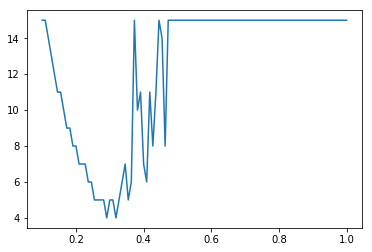

In [47]:
fun2(f, 0.01, f_dash)

### Numerical Integration

In [12]:
import sympy as sy
import numpy as np
import math
import scipy.stats as ss
import random
import scipy.integrate as si
from matplotlib import pyplot as plt
from matplotlib import mlab as mlab

#### Problem 2.1

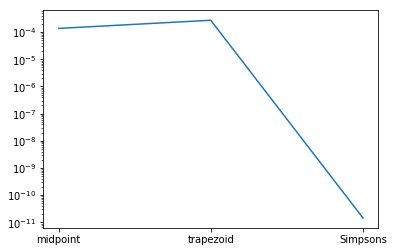

In [14]:
def num_integration(g, a, b, N, method = "midpoint"):
    integral = 0
    bins = np.linspace(a, b, N+1)
    for i in range(0,N):
        lb = bins[i]
        ub = bins[i+1]
        if method == "midpoint":
            mp = (lb + ub) / 2
            integral += (b - a) / N * g(mp)
        elif method == "trapezoid":
            integral += (b - a) / N * (g(lb) + g(ub)) / 2
        elif method == "Simpsons":
            mp = (lb + ub) / 2
            integral += (b - a) / N * (g(lb) + 4 * g(mp) + g(ub)) / 6
    
    return integral

x = sy.symbols('x')
f = 0.1 * x ** 4 + (-1.5) * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
a, b, N = (-10, 10, 10000)
F = sy.integrate(f)
g = sy.lambdify(x, f)
G = sy.lambdify(x, F)
y_sym = G(b) - G(a)
abs_error = {}

for i in ["midpoint", "trapezoid", "Simpsons"]:
    abs_error[i] = abs(num_integration(g, a, b, N, method = i) - y_sym)

method = list(abs_error.keys())
errors = list(abs_error.values())

plt.semilogy(method, errors)

The absolute error in the approximate integral value is very close to the actual integral value. We can also infer that both the midpoint and the trapezoid methods provide more-or-less the same accuracy while the Simpsons method provides the most accurate approximation of the integral.

#### Problem 2.2

for N = 11
weights =  [0.0, 0.0, 0.0013, 0.0346, 0.2383, 0.4515, 0.2383, 0.0346, 0.0013, 0.0, 0.0]
nodes =  [-6.  -4.8 -3.6 -2.4 -1.2  0.   1.2  2.4  3.6  4.8  6. ]


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


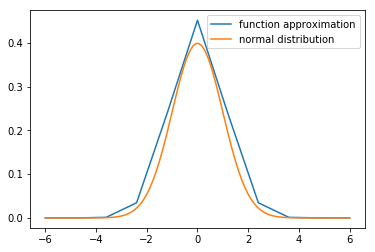

In [23]:
def integrate_normal(mu, sigma, N, k):
    a = mu - k * sigma
    b = mu + k * sigma
    z = np.linspace(a, b, N)
    w = []
    for i in range(N):
        if i == 0:
            mp = (z[i] + z[i + 1]) / 2
            w.append(round(ss.norm.cdf(mp, mu, sigma), 4))
        elif i == (N - 1):
            mp = (z[i - 1] + z[i]) / 2
            w.append(round(1 - ss.norm.cdf(mp, mu, sigma), 4))
        else:
            mp_lb = (z[i - 1] + z[i]) / 2
            mp_ub = (z[i] + z[i + 1]) / 2
            w.append(round(ss.norm.cdf(mp_ub, mu, sigma) - ss.norm.cdf(mp_lb, mu, sigma), 4))
    return (w, z)

mu, sigma, N, k = 0, 1, 11, 6
w, z = integrate_normal(mu, sigma, N, k)
print('for N =', N)
print('weights = ', w)
print('nodes = ', z)

plt.plot(z, w, label = "function approximation")
x = np.linspace(mu - k*sigma, mu + k*sigma, 100)
plt.plot(x, mlab.normpdf(x, mu, sigma), label = "normal distribution")
plt.legend()
plt.show()

#### Problem 2.3

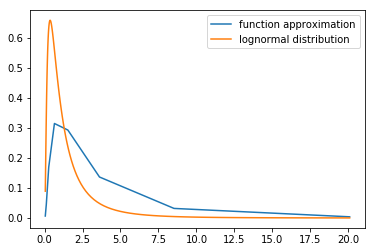

In [24]:
def integrate_lognormal(mu, sigma, N, k):
    a = mu - k * sigma
    b = mu + k * sigma
    z = np.exp(np.linspace(a, b, N))
    w = []
    for i in range(N):
        if i == 0:
            mp = (z[i] + z[i + 1]) / 2
            w_val = ss.lognorm.cdf(mp, sigma, 0, np.exp(mu))
            w.append(round(w_val, 4))

        elif i == (N - 1):
            mp = (z[i - 1] + z[i]) / 2
            w_val = 1 - ss.lognorm.cdf(mp, sigma, 0, np.exp(mu))
            w.append(round(w_val, 4))
            
        else:
            mp_lb = (z[i - 1] + z[i]) / 2
            mp_ub = (z[i] + z[i + 1]) / 2
            w_val_lb = round(ss.lognorm.cdf(mp_lb, sigma, 0, np.exp(mu)), 4)
            w_val_ub = round(ss.lognorm.cdf(mp_ub, sigma, 0, np.exp(mu)), 4)
            w.append(round(w_val_ub - w_val_lb, 4))

    return (np.array(w), z)

mu, sigma, N, k = 0, 1, 8, 3
w, z = integrate_lognormal(mu, sigma, N, k)
plt.plot(z, w, label = "function approximation")

x = np.exp(np.linspace(mu - k*sigma, mu + k*sigma, 100))
plt.plot(x, ss.lognorm.pdf(x, sigma, 0, np.exp(mu)), label = "lognormal distribution")

plt.legend()

#### Problem 2.4

In [25]:
#Calculating the approx expected income as the area under the pdfd curve = z * w
mu, sigma, N, k = 10.5, 0.8, 1000, 10
w, z = integrate_lognormal(mu, sigma, N, k)
approx_eincome = sum(w * z)
act_eincome = math.exp(mu + (sigma ** 2) / 2)
print("Approximate expected income = ${:0.3f}".format(approx_eincome))
print("Actual expected income = ${:0.3f}".format(act_eincome))
print("Difference = ${:0.3f}".format(approx_eincome - act_eincome))

Approximate expected income = $50002.054
Actual expected income = $50011.087
Difference = $-9.034


#### Problem 3.1

In [26]:
#using the weights and nodes as calculated by https://pomax.github.io/bezierinfo/legendre-gauss.html for N = 3
x = sy.symbols('x')
f = 0.1 * x ** 4 + (-1.5) * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
g = sy.lambdify(x, f)
a, b = -10, 10
k = (b - a) / 2
l = (b + a) / 2
x_vals = [0, -(0.6 ** 0.5), 0.6 ** 0.5]
w_vals = [8/9, 5/9, 5/9]
guass_res = 0
for i in range(3):
    guass_res += w_vals[i] * g(k * x_vals[i] + l) 
guass_res *= k
print("Integral value using Gaussian quadrature method = ",  guass_res)
print("Integral value using symbolic method = ",  y_sym)
print("Absolute error between the two methods = {0:.20f}".format(abs(guass_res - y_sym)))

Integral value using Gaussian quadrature method =  4373.333333333334
Integral value using symbolic method =  4373.333333333334
Absolute error between the two methods = 0.00000000000000000000


#### Problem 3.2

In [27]:
scipy_res = si.quad(g, -10, 10)[0]
print("Result using scipy.integrate.quad = ", scipy_res)
print("Abs error of scipy method w.r.t actual value = {0:.20f}".format(abs(scipy_res -  y_sym)))

Result using scipy.integrate.quad =  4373.333333333334
Abs error of scipy method w.r.t actual value = 0.00000000000000000000


#### Problem 4.1

In [28]:
def monte_carlo(g, omega, N):
    np.random.seed = 25
    x_lb, x_ub = omega[0][0], omega[0][1]
    y_lb, y_ub = omega[1][0], omega[1][1]
    area = (x_ub - x_lb) * (y_ub - y_lb)
    x_vals = np.random.uniform(x_lb, x_ub, N)
    y_vals = np.random.uniform(y_lb, y_ub, N)
    loc_vec = [g(x_vals[i], y_vals[i]) for i in range(N)]
    
    return area * sum(loc_vec) / len(loc_vec)

def g(x, y):
    return (x ** 2 + y ** 2) <= 1
omega = [[-1,1], [-1,1]]
N = 2
while 1:
    if round(monte_carlo(g, omega, N), 4) != 3.1415:
        N += 1
    else:
        print("smallest N value to achieve 3.1415 = ", N)
        break

smallest N value to achieve 3.1415 =  4361
